In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [133]:
# Load data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

# Extract features and labels from data
train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values.reshape(-1, 1)

validate_X = validate_data.iloc[:, :-1].values
validate_y = validate_data.iloc[:, -1].values.reshape(-1, 1)


In [134]:
# Normalize features (Preprocessing step)
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
validate_X = (validate_X - np.mean(validate_X, axis=0)) / np.std(validate_X, axis=0)

# One-hot encode labels to represent categorical variables
one_hot_train_y = np.eye(2)[train_y.flatten()]
one_hot_validate_y = np.eye(2)[validate_y.flatten()]


In [135]:
# Defining activation functions
#ReLU is widely used in hidden layers as it allows the model to learn complex patterns and representations.
def relu(x):
    return np.maximum(0, x)

#The Sigmoid function is commonly used in the output layer of binary classification models
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Defining loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [136]:
# Parameters Initialization
input_size = 2
hidden_size = 10
output_size = 2

np.random.seed(42)
hidden_weights_0 = np.random.randn(input_size, hidden_size) * 0.01
hidden_bias_0 = np.zeros((1, hidden_size))

hidden_weights_1 = np.random.randn(hidden_size, hidden_size) * 0.01
hidden_bias_1 = np.zeros((1, hidden_size))

output_weights_2 = np.random.randn(hidden_size, output_size) * 0.01
output_bias_2 = np.zeros((1, output_size))


In [137]:
# Training parameters
learning_rate = 0.1
epochs = 1000
batch_size = 16

# Parameters for early stopping
wait = 20
best_loss = np.inf
stop_counter = 0


In [138]:
# Lists to store training and validation losses
training_losses = []
validation_losses = []

# Main Implementation loop for training 
for epoch in range(epochs):
    for i in range(0, len(train_X), batch_size):
        # Mini-batch
        X_batch = train_X[i:i+batch_size]
        y_batch = one_hot_train_y[i:i+batch_size]

        # Forward pass
        layer_0 = X_batch
        layer_1 = relu(np.dot(layer_0, hidden_weights_0) + hidden_bias_0)
        layer_2 = relu(np.dot(layer_1, hidden_weights_1) + hidden_bias_1)
        output = sigmoid(np.dot(layer_2, output_weights_2) + output_bias_2)

        # Calling binary_cross_entropy_loss() to Calculate loss
        loss = binary_cross_entropy_loss(y_batch, output)

        # Backward pass
        output_b = output - y_batch
        layer_2_b = np.dot(output_b, output_weights_2.T) * (layer_2 > 0)
        layer_1_b = np.dot(layer_2_b, hidden_weights_1.T) * (layer_1 > 0)

        # weights and biases updating
        output_weights_2 -= learning_rate * np.dot(layer_2.T, output_b) / batch_size
        output_bias_2 -= learning_rate * np.sum(output_b, axis=0, keepdims=True) / batch_size

        hidden_weights_1 -= learning_rate * np.dot(layer_1.T, layer_2_b) / batch_size
        hidden_bias_1 -= learning_rate * np.sum(layer_2_b, axis=0, keepdims=True) / batch_size

        hidden_weights_0 -= learning_rate * np.dot(layer_0.T, layer_1_b) / batch_size
        hidden_bias_0 -= learning_rate * np.sum(layer_1_b, axis=0, keepdims=True) / batch_size

    # Calculating validation loss
    layer_1_validity = relu(np.dot(validate_X, hidden_weights_0) + hidden_bias_0)
    layer_2_validity = relu(np.dot(layer_1_validity, hidden_weights_1) + hidden_bias_1)
    output_validity = sigmoid(np.dot(layer_2_validity, output_weights_2) + output_bias_2)
    validity_loss = binary_cross_entropy_loss(one_hot_validate_y, output_validity)

   

    # Store losses for plotting
    training_losses.append(loss)
    validation_losses.append(validity_loss)

    if validity_loss < best_loss:
        best_loss = validity_loss
        stop_counter = 0
    else:
        stop_counter += 1

    if stop_counter >= wait:
        print("Model training is complete. Training is stoped")
        break
 
     # Print loss and check for early stopping
    print(f"Epoch: {epoch}, Training Loss: {loss}, Validation Loss: {validity_loss}")

Epoch: 0, Training Loss: 0.6955674963229403, Validation Loss: 0.6931468593292708
Epoch: 1, Training Loss: 0.6954954994542966, Validation Loss: 0.6931469091243537
Epoch: 2, Training Loss: 0.695457958103104, Validation Loss: 0.6931469346816141
Epoch: 3, Training Loss: 0.6954383152853623, Validation Loss: 0.6931469386074139
Epoch: 4, Training Loss: 0.6954281199223574, Validation Loss: 0.693146928325429
Epoch: 5, Training Loss: 0.6954227626569953, Validation Loss: 0.693146909589782
Epoch: 6, Training Loss: 0.6954198971357072, Validation Loss: 0.6931468854107482
Epoch: 7, Training Loss: 0.6954184462405572, Validation Loss: 0.6931468585723753
Epoch: 8, Training Loss: 0.6954176931416323, Validation Loss: 0.6931468293814232
Epoch: 9, Training Loss: 0.6954172633862965, Validation Loss: 0.6931467984028993
Epoch: 10, Training Loss: 0.6954169566389539, Validation Loss: 0.693146765910774
Epoch: 11, Training Loss: 0.6954168759127425, Validation Loss: 0.6931467317927785
Epoch: 12, Training Loss: 0.69

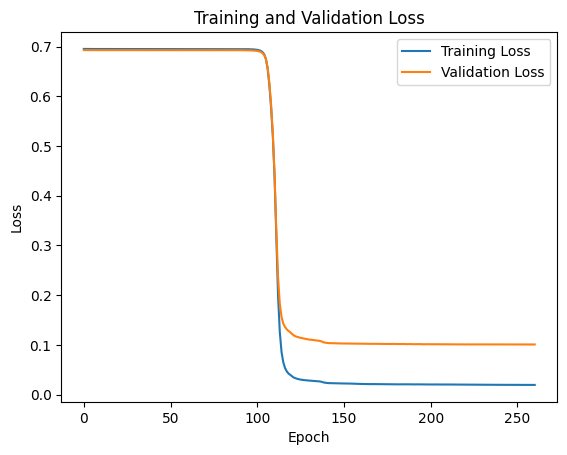

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.30966559  1.69058183]
 [ 2.06754694 38.93245343]]


In [139]:
# Plot the loss over epochs
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Final accuracy and confusion matrix on the validation set
pred_labels = np.argmax(output_validity, axis=1)
accuracy = np.mean(pred_labels == validate_y.flatten())
confusion_matrix = np.dot(np.transpose(one_hot_validate_y), output_validity)
print(f"Final Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix)
